# DL3-IRF Validation and Testing

Some plotting routines to valide converted IRFs and compare to other files.

Hardwired IRF file names for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable
import astropy.units as u

In [2]:
%matplotlib inline

In [23]:
datadir='/Users/maierg/DESYCloud/Eventdisplay/Git/Converters/DL3-IRFs/data/'
#datadir='./'
# test file
#rf_file = datadir+'Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits.gz'
rf_file = datadir+"./tt.fits.gz"
# ctools-converted file
ct_file = datadir+'ctools.fits.gz'

In [24]:
plt.rcParams['figure.figsize'] = (9,6)

# EDisp

In [25]:
rf_edisp = QTable.read(rf_file, hdu='ENERGY DISPERSION')[0]
ct_edisp = QTable.read(ct_file, hdu='ENERGY DISPERSION')[0]

In [26]:
rf_edisp

ENERG_LO [300],ENERG_HI [300],MIGRA_LO [300],MIGRA_HI [300],THETA_LO [6],THETA_HI [6],"MATRIX [6,300,300]"
TeV,TeV,,,deg,deg,
float32,float32,float32,float32,float32,float32,float32
0.009999999776482582 .. 9549.92578125,0.010471285320818424 .. 10000.0,0.0 .. 2.99,0.01 .. 3.0,0.0 .. 5.0,1.0 .. 6.0,0.0 .. 0.0


In [27]:
ct_edisp

ENERG_LO [500],ENERG_HI [500],MIGRA_LO [300],MIGRA_HI [300],THETA_LO [6],THETA_HI [6],"MATRIX [6,300,500]"
TeV,TeV,,,deg,deg,
float32,float32,float32,float32,float32,float32,float32
0.005011872388422489 .. 489.77880859375,0.005128613673150539 .. 501.1872253417969,0.0 .. 2.99,0.01 .. 3.0,0.0 .. 5.0,1.0 .. 6.0,0.0 .. 0.0


In [28]:
def plot_edisp(edisp,
              title,
              eslice_TeV=1. ):
    """
    """
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    e_bins = edisp['ENERG_LO'][1:]
    migra_bins = edisp['MIGRA_LO'][1:]
    edisp_matrix = edisp['MATRIX'].T[1:-1, 1:-1, 0]
    bx=(np.abs(e_bins.to_value(u.TeV) - eslice_TeV)).argmin()
    print('bin',bx)

    plt.title('DL3-IRF Converted')
    plt.pcolormesh(e_bins.to_value(u.TeV), 
                   migra_bins, 
                   edisp_matrix.T, 
                   cmap='inferno')
    plt.xscale('log')
    plt.colorbar(label='PDF Value')

    plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
    plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

    axs[0].plot(migra_bins, edisp['MATRIX'][0, :-1, bx])
    axs[0].set(xlabel=r'$E_\mathrm{Reco} / E_\mathrm{True}$')
    axs[0].set_title('')

bin 99
bin 229


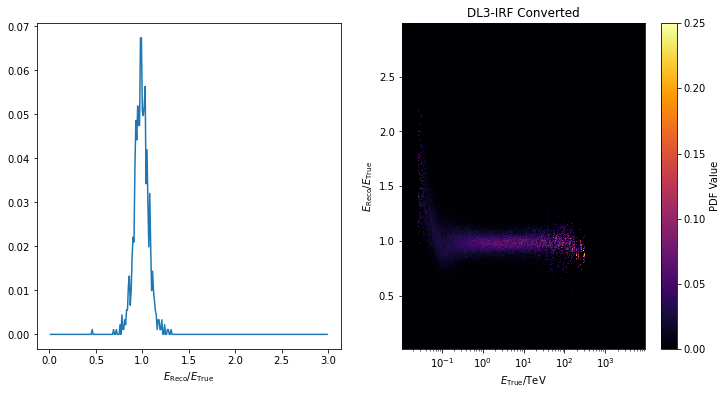

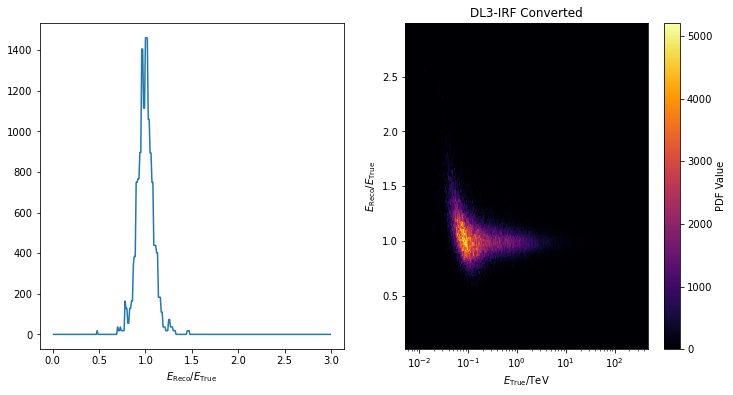

In [29]:
plot_edisp(rf_edisp, 'DL3-IRF Converted', 1.)
plot_edisp(ct_edisp, 'IRF ctools', 1.)

# PSF

In [30]:
rf_pst = QTable.read(rf_file, hdu='POINT SPREAD FUNCTION')[0]
ct_pst = QTable.read(ct_file, hdu='POINT SPREAD FUNCTION')[0]

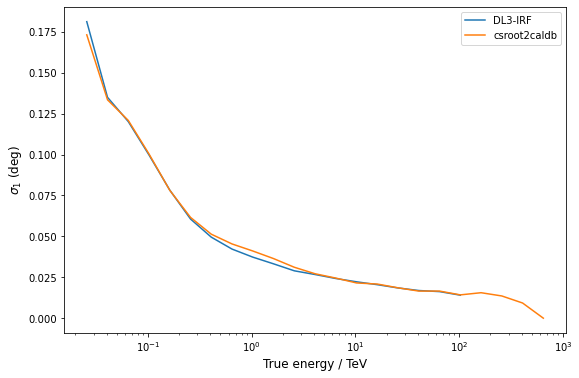

In [11]:
plt.plot(
    0.5 * (rf_pst['ENERG_LO'] + rf_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_pst['SIGMA_1'].T[1:-1, 0],
    label='DL3-IRF'
)
plt.plot(
0.5 * (ct_pst['ENERG_LO'] + ct_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_pst['SIGMA_1'].T[1:-1, 0],
label='csroot2caldb'
)
plt.xscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("$\sigma_1$ (deg)",fontsize=12)
plt.legend()

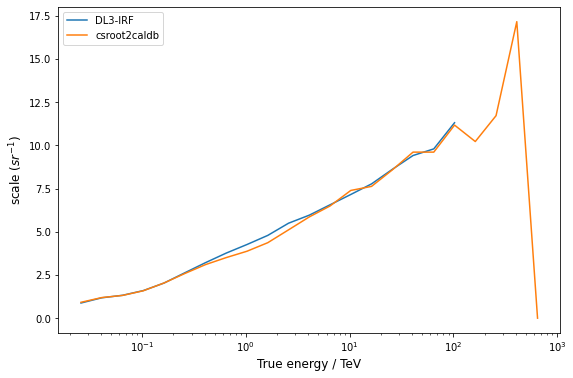

In [12]:
plt.plot(
    0.5 * (rf_pst['ENERG_LO'] + rf_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_pst['SCALE'].T[1:-1, 0],
    label='DL3-IRF'
)
plt.plot(
0.5 * (ct_pst['ENERG_LO'] + ct_pst['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_pst['SCALE'].T[1:-1, 0],
label='csroot2caldb'
)
plt.xscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("scale ($sr^{-1}$)",fontsize=12)
plt.legend()

# PSF (3D)

In [13]:
rf_psf3d = QTable.read(py_file, hdu='PSF')[0]

NameError: name 'py_file' is not defined

In [14]:
rf_psf3d['RPSF'].T[1:-1, 1:-1, 0]

NameError: name 'rf_psf3d' is not defined

In [15]:
e_bins = rf_psf3d['ENERG_LO'][1:]
migra_bins = rf_psf3d['RAD_LO'][1:]
psfdisp_matrix = rf_psf3d['RPSF'].T[1:-1, 1:-1, 0]

plt.title('pyrif')
plt.pcolormesh(e_bins.to_value(u.TeV), migra_bins, psfdisp_matrix.T, cmap='inferno')


plt.xscale('log')
#plt.yscale('log')
plt.colorbar(label='PDF Value')

plt.xlabel(r'$E_\mathrm{True} / \mathrm{TeV}$')
plt.ylabel(r'$E_\mathrm{Reco} / E_\mathrm{True}$')

NameError: name 'rf_psf3d' is not defined

# BCK rate

In [31]:
rf_bck = QTable.read(rf_file, hdu='BACKGROUND')[0]
ct_bck = QTable.read(ct_file, hdu='BACKGROUND')[0]

In [32]:
rf_bck

ENERG_LO [21],ENERG_HI [21],DETX_LO [60],DETX_HI [60],DETY_LO [60],DETY_HI [60],"BKG [60,60,21]"
TeV,TeV,deg,deg,deg,deg,1 / (MeV s sr)
float32,float32,float32,float32,float32,float32,float32
0.012589254416525364 .. 125.89253997802734,0.019952623173594475 .. 199.52622985839844,-6.0 .. 5.800000190734863,-5.800000190734863 .. 6.0,-6.0 .. 5.800000190734863,-5.800000190734863 .. 6.0,0.0 .. 0.0


In [33]:
ct_bck

DETX_LO [36],DETX_HI [36],DETY_LO [36],DETY_HI [36],ENERG_LO [21],ENERG_HI [21],"BKG [21,36,36]"
deg,deg,deg,deg,TeV,TeV,1/(MeV s sr)
float32,float32,float32,float32,float32,float32,float32
-6.0 .. 5.666666507720947,-5.666666507720947 .. 6.0,-6.0 .. 5.666666507720947,-5.666666507720947 .. 6.0,0.012589254416525364 .. 125.89253997802734,0.019952623173594475 .. 199.52622985839844,0.0 .. 0.0


Text(0, 0.5, 'background rate ($s{^-1} MeV{^-1} sr^{-1}$)')

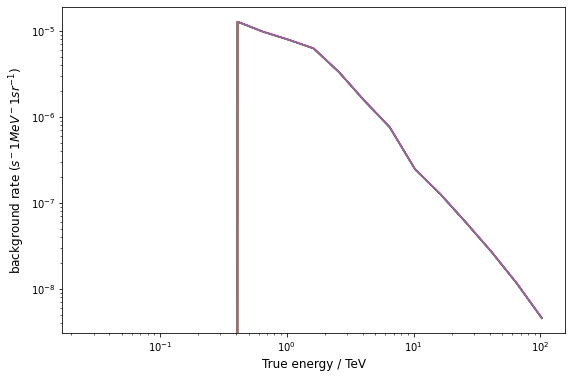

In [34]:
plt.plot(
    0.5 * (rf_bck['ENERG_LO'] + rf_bck['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_bck['BKG'].T[1:-1, 0],
    label='rf '
)
#plt.plot(
#0.5 * (ct_bck['ENERG_LO'] + ct_bck['ENERG_HI']).to_value(u.TeV)[1:-1],
#ct_bck['BKG'].T[1:-1,0],
#label='rf '
#)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("background rate ($s{^-1} MeV{^-1} sr^{-1}$)",fontsize=12)

# Effective area

In [101]:
rf_eff = QTable.read(rf_file, hdu='EFFECTIVE AREA')[0]
ct_eff = QTable.read(ct_file, hdu='EFFECTIVE AREA')[0]

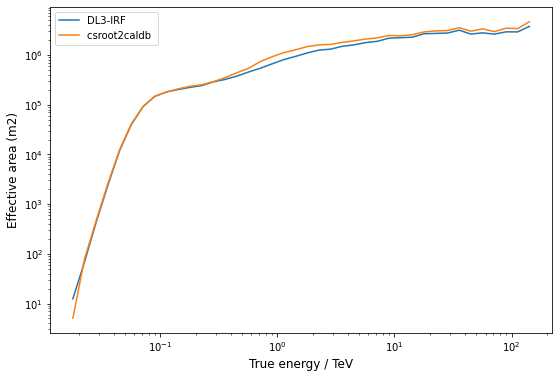

In [102]:
plt.plot(
    0.5 * (rf_eff['ENERG_LO'] + rf_eff['ENERG_HI']).to_value(u.TeV)[1:-1],
    rf_eff['EFFAREA'].T[1:-1, 0],
    label='DL3-IRF '
)
plt.plot(
0.5 * (ct_eff['ENERG_LO'] + ct_eff['ENERG_HI']).to_value(u.TeV)[1:-1],
ct_eff['EFFAREA'].T[1:-1, 0],
label='csroot2caldb '
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy / TeV",fontsize=12)
plt.ylabel("Effective area (m2)",fontsize=12)
plt.legend()